In [2]:
import numpy as np
import _pickle as pickle
import bcolz
from tqdm import tqdm 

## Transforming GLOVE

In [3]:
path = '/data/glove/'
res_path = path+'results/'

In [ ]:
#with open(path+ 'glove.840B.300d.txt', 'r', encoding='utf8') as f:    
#    lines = [line.split() for line in f]

In [40]:
len(lines)

400000

In [15]:
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()

def get_glove(name):
    words=[]
    vecs = []
    with open(path+ 'glove.' + name + '.txt', 'r', encoding='utf8') as f: 
        for line in tqdm(f):
            try:
                d = line.split()
                if len(d) == 301:
                    words.append(d[0])
                    vecs.append(np.array(d[1:], dtype=np.float32))
            except ValueError as err:
                print(line)
    
    save_array(res_path+name+'.dat', vecs)
    pickle.dump(words, open(res_path+name+'_words.pkl','wb'))
    
    wordidx = {o:i for i,o in enumerate(words)}
    pickle.dump(wordidx, open(res_path+name+'_idx.pkl','wb'))

In [16]:
get_glove('840B.300d')

2196017it [02:19, 15772.57it/s]


In [50]:
get_glove('6B.50d')
get_glove('6B.100d')
get_glove('6B.200d')
get_glove('6B.300d')

## Look at the vectors

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import _pickle as pickle
import bcolz
from sklearn.manifold import TSNE


In [5]:
def load_array(fname):
    return bcolz.open(fname)[:]

In [6]:
def load_glove(loc):
    return (load_array(loc+'.dat'),
        pickle.load(open(loc+'_words.pkl','rb')),
        pickle.load(open(loc+'_idx.pkl','rb')))

In [7]:
vecs, words, wordidx = load_glove(res_path+'840B.300d')
vecs.shape

(2195988, 300)

In [8]:
def w2v(w): return vecs[wordidx[w]]

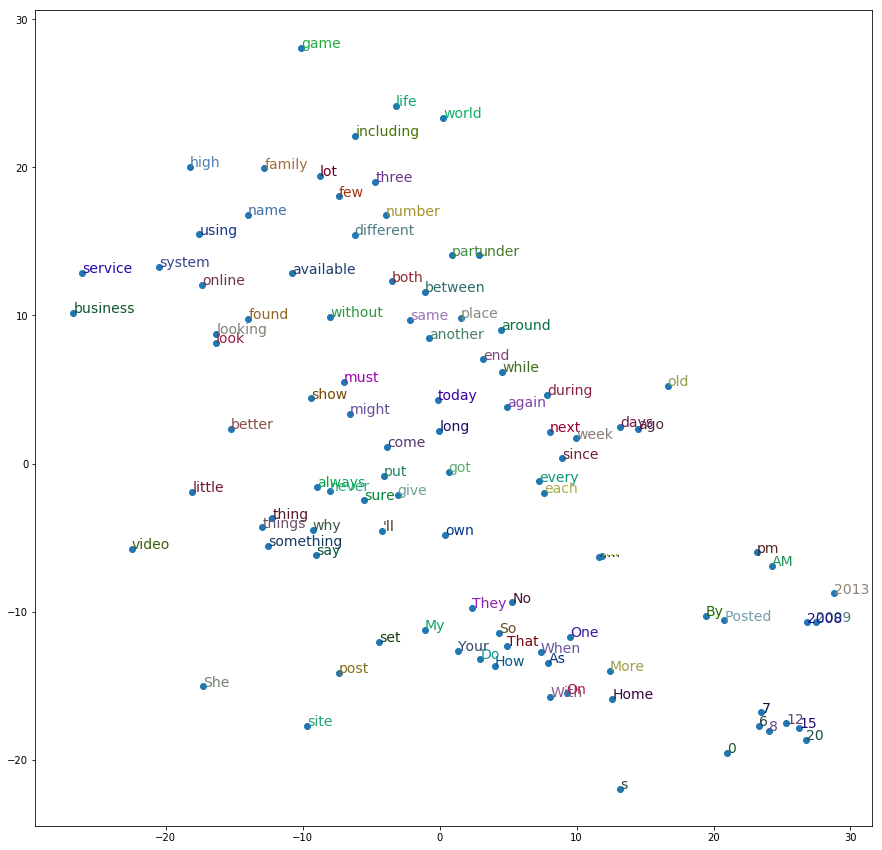

In [9]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vecs[:500])

start=200; end=300
dat = Y[start:end]
plt.figure(figsize=(15,15))
plt.scatter(dat[:, 0], dat[:, 1])
for label, x, y in zip(words[start:end], dat[:, 0], dat[:, 1]):
    plt.text(x,y,label, color=np.random.rand(3)*0.7,
                 fontsize=14)
plt.show()

In [17]:
def find_closest_match(vector, top=10):
    results = []
    for idx in tqdm(range(len(words))):
        results.append([np.linalg.norm(vecs[idx] - vector), words[idx]])
        if len(results) > top*100:
            results = sorted(results)[:top]
    print(np.array(sorted(results))[:top])

In [19]:
find_closest_match(w2v('devil'), 50)

100%|██████████| 2195988/2195988 [00:27<00:00, 80434.88it/s]

[['0.0' 'devil']
 ['4.15932' 'devils']
 ['4.51959' 'satan']
 ['4.63889' 'demon']
 ['4.89629' 'Satan']
 ['5.03665' 'evil']
 ['5.09979' 'hell']
 ['5.15574' 'demons']
 ['5.24754' 'wicked']
 ['5.25113' 'Devil']
 ['5.39152' 'demonic']
 ['5.39486' 'fool']
 ['5.45816' 'damned']
 ['5.5455' 'beast']
 ['5.6071' 'ghost']
 ['5.61831' 'devilish']
 ['5.62166' 'mad']
 ['5.62486' 'heaven']
 ['5.67548' 'angel']
 ['5.69278' 'curse']
 ['5.73296' 'witch']
 ['5.73433' 'temptation']
 ['5.75953' 'Lucifer']
 ['5.78566' 'god']
 ['5.81024' 'disguise']
 ['5.81547' 'whoever']
 ['5.82339' 'dare']
 ['5.88022' 'swf/twc-widget-map']
 ['5.88252' 'afraid']
 ['5.89278' 'jesus']
 ['5.89782' 'nothing']
 ['5.92195' 'satanic']
 ['5.94541' 'angels']
 ['5.9475' 'fiend']
 ['5.95306' 'christ']
 ['5.96389' 'believing']
 ['5.96798' 'thing']
 ['5.96894' 'bastard']
 ['5.97261' 'snake']
 ['5.99912' 'beware']
 ['6.00442' 'indeed']
 ['6.00713' 'nobody']
 ['6.01622' 'wonder']
 ['6.0171' 'trick']
 ['6.02285' 'whatever']
 ['6.02423' 'str